# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from datetime import datetime
import pywt
from skimage.restoration import denoise_wavelet
from sklearn.preprocessing import normalize
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.neighbors import LocalOutlierFactor
import keras 
from keras.models import Sequential 
from keras.models import Sequential 
from keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split

# file and dataset

In [2]:
file_path = r'D:\stuff\college\ML\ceeri\Fwd data\benchydefect.csv'
file_path_2 = r'D:\stuff\college\ML\ceeri\Fwd data\normalbenchy.csv'
file_path_3 = r'D:\stuff\college\ML\ceeri\Fwd data\SensorDataFile.csv'
dataset_1 = pd.read_csv(file_path)
dataset_2 = pd.read_csv(file_path_2)
dataset_3 = pd.read_csv(file_path_3)

# Dataset Dismantle

In [3]:
acc = dataset_1.iloc[:, 3:6]
gyro = dataset_1.iloc[:, 6:9]
acc_x_axis = dataset_1.iloc[:, 3]
gyro_x_axis = dataset_1.iloc[:, 6]
acc_y_axis = dataset_1.iloc[:, 4]
gyro_y_axis = dataset_1.iloc[:, 7]
acc_z_axis = dataset_1.iloc[:, 5]
gyro_z_axis = dataset_1.iloc[:, 8]
label = dataset_1.iloc[:,9]

acc_2 = dataset_2.iloc[:, 3:6]
gyro_2 = dataset_2.iloc[:, 6:9]
acc_x_axis_2 = dataset_2.iloc[:, 3]
gyro_x_axis_2 = dataset_2.iloc[:, 6]
acc_y_axis_2 = dataset_2.iloc[:, 4]
gyro_y_axis_2 = dataset_2.iloc[:, 7]
acc_z_axis_2 = dataset_2.iloc[:, 5]
gyro_z_axis_2 = dataset_2.iloc[:, 8]
label_2 = dataset_2.iloc[:,9]

acc_3 = dataset_3.iloc[:, 3:6]
gyro_3 = dataset_3.iloc[:, 6:9]
acc_x_axis_3 = dataset_3.iloc[:, 3]
gyro_x_axis_3 = dataset_3.iloc[:, 6]
acc_y_axis_3 = dataset_3.iloc[:, 4]
gyro_y_axis_3 = dataset_3.iloc[:, 7]
acc_z_axis_3 = dataset_3.iloc[:, 5]
gyro_z_axis_3 = dataset_3.iloc[:, 8]
label_3 = dataset_3.iloc[:,9]

# Functions

In [4]:
def PCA_FXN(df,title):
    pca = PCA(n_components=1)
    pca.fit(df)
    principal_components = pca.fit_transform(df)
    acc_pca = pd.DataFrame(data=principal_components, columns=[title])
    return acc_pca
def plot(df,df_acc, title ):
    plt.plot(df.time_label, df_acc)
    plt.xlabel('Time(seconds)')
    plt.ylabel('Value')
    plt.title(title)
def time_string_to_microseconds(time_str):
    hours, minutes, seconds = map(int, time_str.split(':'))
    total_microseconds = ((hours * 3600) + (minutes * 60) + seconds) * 10**6
    return total_microseconds
def conversion_to_microseconds(df):
    time_series = df.iloc[:,1]
    time_in_micro= time_series.apply(time_string_to_microseconds)
    time_in_micro = time_in_micro + df.iloc[:,2]
    time_label = (time_in_micro - time_in_micro[0])/1000000
    return time_label



# Making and adding time label

In [5]:
time_label = conversion_to_microseconds(dataset_1)
dataset_1['time_label']=time_label
time_label= conversion_to_microseconds(dataset_2)
dataset_2['time_label']=time_label
time_label= conversion_to_microseconds(dataset_3)
dataset_3['time_label']=time_label

# PCA of Noisy Data

In [6]:
gyro_pca = PCA_FXN(gyro,'gyro_col')
acc_pca = PCA_FXN(gyro,'acc_col')

gyro_pca_2 = PCA_FXN(gyro_2,'gyro_col_2')
acc_pca_2 = PCA_FXN(acc_2,'acc_col_2')

gyro_pca_3 = PCA_FXN(gyro_3,'gyro_col_3')
acc_pca_3= PCA_FXN(acc_3,'acc_col_3')

# Ploting Noisy Data

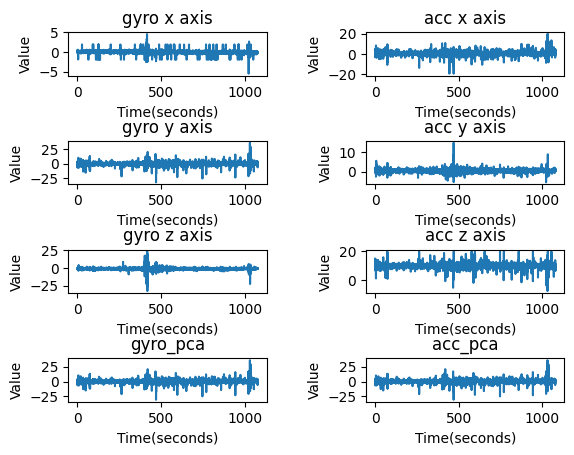

In [7]:
%matplotlib inline
# benchydefect.csv
plt.subplot(4, 2, 1)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_1,gyro_x_axis, 'gyro x axis')
plt.subplot(4, 2, 2)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_1,acc_x_axis, 'acc x axis')
plt.subplot(4, 2, 3)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_1,gyro_y_axis, 'gyro y axis')
plt.subplot(4, 2, 4)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_1,acc_y_axis, 'acc y axis')
plt.subplot(4, 2, 5)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_1,gyro_z_axis, 'gyro z axis')
plt.subplot(4, 2, 6)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_1,acc_z_axis, 'acc z axis')
plt.subplot(4, 2, 7)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_1,gyro_pca, 'gyro_pca')
plt.subplot(4, 2, 8)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_1,acc_pca, 'acc_pca')
plt.show()

In [8]:
print(list(dataset_2))

['Date\n(YY:MM:DD)', 'Time\n(HH:MM:SS)', 'Time\n(µs)', 'Ax\n(m/s^2)', 'Ay\n(m/s^2)', 'Az\n(m/s^2)', 'Gx\n(deg/s)', 'Gy\n(deg/s)', 'Gz\n(deg/s)', 'label', 'time_label']


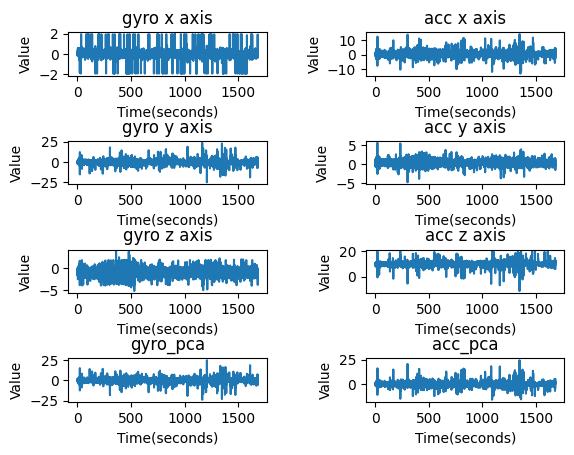

In [9]:
%matplotlib inline
# normalybenchy.csv
plt.subplot(4, 2, 1)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_2,gyro_x_axis_2, 'gyro x axis')
# plt.plot(dataset_2.time_label, gyro_x_axis_2)
# plt.xlabel('Time(seconds)')
# plt.ylabel('Value')
# plt.title('gyro x axis')
plt.subplot(4, 2, 2)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_2,acc_x_axis_2, 'acc x axis')
plt.subplot(4, 2, 3)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_2,gyro_y_axis_2, 'gyro y axis')
plt.subplot(4, 2, 4)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_2,acc_y_axis_2, 'acc y axis')
plt.subplot(4, 2, 5)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_2,gyro_z_axis_2, 'gyro z axis')
plt.subplot(4, 2, 6)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_2,acc_z_axis_2, 'acc z axis')
plt.subplot(4, 2, 7)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_2,gyro_pca_2, 'gyro_pca')
plt.subplot(4, 2, 8)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_2,acc_pca_2, 'acc_pca')
plt.show()

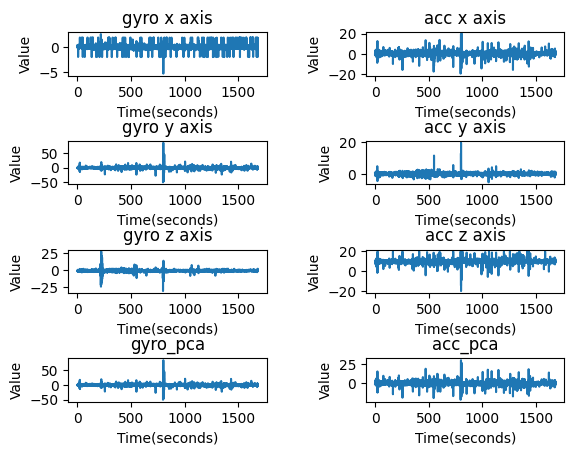

In [10]:
%matplotlib inline
# SensorDataFile.csv
plt.subplot(4, 2, 1)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_3,gyro_x_axis_3, 'gyro x axis')
plt.subplot(4, 2, 2)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_3,acc_x_axis_3, 'acc x axis')
plt.subplot(4, 2, 3)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_3,gyro_y_axis_3, 'gyro y axis')
plt.subplot(4, 2, 4)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_3,acc_y_axis_3, 'acc y axis')
plt.subplot(4, 2, 5)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_3,gyro_z_axis_3, 'gyro z axis')
plt.subplot(4, 2, 6)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_3,acc_z_axis_3, 'acc z axis')
plt.subplot(4, 2, 7)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_3,gyro_pca_3, 'gyro_pca')
plt.subplot(4, 2, 8)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_3,acc_pca_3, 'acc_pca')
plt.show()

# Denoising Data

In [11]:
#benchydefect
denoised_acc_x_axis_nparray = denoise_wavelet(acc_x_axis, method='VisuShrink', mode='soft')
denoised_acc_y_axis_nparray = denoise_wavelet(acc_y_axis, method='VisuShrink', mode='soft')
denoised_acc_z_axis_nparray = denoise_wavelet(acc_z_axis, method='VisuShrink', mode='soft')
denoised_gyro_x_axis_nparray = denoise_wavelet(gyro_x_axis, method='VisuShrink', mode='soft')
denoised_gyro_y_axis_nparray = denoise_wavelet(gyro_y_axis, method='VisuShrink', mode='soft')
denoised_gyro_z_axis_nparray = denoise_wavelet(gyro_z_axis, method='VisuShrink', mode='soft')

In [12]:
#normalbenchy
denoised_acc_x_axis_nparray_2 = denoise_wavelet(acc_x_axis_2, method='VisuShrink', mode='soft')
denoised_acc_y_axis_nparray_2 = denoise_wavelet(acc_y_axis_2, method='VisuShrink', mode='soft')
denoised_acc_z_axis_nparray_2 = denoise_wavelet(acc_z_axis_2, method='VisuShrink', mode='soft')
denoised_gyro_x_axis_nparray_2 = denoise_wavelet(gyro_x_axis_2, method='VisuShrink', mode='soft')
denoised_gyro_y_axis_nparray_2 = denoise_wavelet(gyro_y_axis_2, method='VisuShrink', mode='soft')
denoised_gyro_z_axis_nparray_2 = denoise_wavelet(gyro_z_axis_2, method='VisuShrink', mode='soft')

In [13]:
#benchydefect
denoised_acc_x_axis_nparray_3 = denoise_wavelet(acc_x_axis_3, method='VisuShrink', mode='soft')
denoised_acc_y_axis_nparray_3 = denoise_wavelet(acc_y_axis_3, method='VisuShrink', mode='soft')
denoised_acc_z_axis_nparray_3 = denoise_wavelet(acc_z_axis_3, method='VisuShrink', mode='soft')
denoised_gyro_x_axis_nparray_3 = denoise_wavelet(gyro_x_axis_3, method='VisuShrink', mode='soft')
denoised_gyro_y_axis_nparray_3 = denoise_wavelet(gyro_y_axis_3, method='VisuShrink', mode='soft')
denoised_gyro_z_axis_nparray_3 = denoise_wavelet(gyro_z_axis_3, method='VisuShrink', mode='soft')

# Pca Of Denoised Data and Normalizing

In [14]:
#benchydefect
denoised_acc_x_axis = pd.Series(denoised_acc_x_axis_nparray)
denoised_acc_y_axis = pd.Series(denoised_acc_y_axis_nparray)
denoised_acc_z_axis = pd.Series(denoised_acc_z_axis_nparray)
denoised_gyro_z_axis = pd.Series(denoised_gyro_z_axis_nparray)
denoised_gyro_y_axis = pd.Series(denoised_gyro_y_axis_nparray)
denoised_gyro_x_axis = pd.Series(denoised_gyro_x_axis_nparray)
denoised_acc = pd.DataFrame([denoised_acc_x_axis,denoised_acc_y_axis,denoised_acc_z_axis]).transpose().set_axis(['denoised_acc_x_axis', 'denoised_acc_y_axis', 'denoised_acc_z_axis'], axis=1)
denoised_gyro = pd.DataFrame([denoised_gyro_x_axis,denoised_gyro_y_axis,denoised_gyro_z_axis]).transpose().set_axis(['denoised_gyro_x_axis', 'denoised_gyro_y_axis', 'denoised_gyro_z_axis'], axis=1)
denoised_gyro_pca = PCA_FXN(denoised_gyro,'gyro_col')
denoised_acc_pca = PCA_FXN(denoised_acc,'acc_col')
normalized_acc = normalize(denoised_acc, norm='l2')
normalized_gyro = normalize(denoised_gyro, norm = 'l2')
normalized_denoised_acc_pca = PCA_FXN(normalized_acc,'acc_col')
normalized_denoised_gyro_pca = PCA_FXN(normalized_gyro, 'gyro_col')

In [15]:
#normalbenchy
denoised_acc_x_axis_2 = pd.Series(denoised_acc_x_axis_nparray_2)
denoised_acc_y_axis_2 = pd.Series(denoised_acc_y_axis_nparray_2)
denoised_acc_z_axis_2 = pd.Series(denoised_acc_z_axis_nparray_2)
denoised_gyro_z_axis_2 = pd.Series(denoised_gyro_z_axis_nparray_2)
denoised_gyro_y_axis_2 = pd.Series(denoised_gyro_y_axis_nparray_2)
denoised_gyro_x_axis_2 = pd.Series(denoised_gyro_x_axis_nparray_2)
denoised_acc_2 = pd.DataFrame([denoised_acc_x_axis_2,denoised_acc_y_axis_2,denoised_acc_z_axis_2]).transpose().set_axis(['denoised_acc_x_axis_2', 'denoised_acc_y_axis_2', 'denoised_acc_z_axis_2'], axis=1)
denoised_gyro_2 = pd.DataFrame([denoised_gyro_x_axis_2,denoised_gyro_y_axis_2,denoised_gyro_z_axis_2]).transpose().set_axis(['denoised_gyro_x_axis_2', 'denoised_gyro_y_axis_2', 'denoised_gyro_z_axis_2'], axis=1)
denoised_gyro_pca_2 = PCA_FXN(denoised_gyro_2,'gyro_col')
denoised_acc_pca_2 = PCA_FXN(denoised_acc_2,'acc_col')
normalized_acc_2 = normalize(denoised_acc_2, norm='l2')
normalized_gyro_2 = normalize(denoised_gyro_2, norm = 'l2')
normalized_denoised_acc_pca_2 = PCA_FXN(normalized_acc_2,'acc_col')
normalized_denoised_gyro_pca_2 = PCA_FXN(normalized_gyro_2, 'gyro_col')

In [16]:
#normalbenchy
denoised_acc_x_axis_3 = pd.Series(denoised_acc_x_axis_nparray_3)
denoised_acc_y_axis_3 = pd.Series(denoised_acc_y_axis_nparray_3)
denoised_acc_z_axis_3 = pd.Series(denoised_acc_z_axis_nparray_3)
denoised_gyro_z_axis_3 = pd.Series(denoised_gyro_z_axis_nparray_3)
denoised_gyro_y_axis_3 = pd.Series(denoised_gyro_y_axis_nparray_3)
denoised_gyro_x_axis_3 = pd.Series(denoised_gyro_x_axis_nparray_3)


denoised_acc_3 = pd.DataFrame([denoised_acc_x_axis_3,denoised_acc_y_axis_3,denoised_acc_z_axis_3]).transpose().set_axis(['denoised_acc_x_axis_3', 'denoised_acc_y_axis_3', 'denoised_acc_z_axis_3'], axis=1)
denoised_gyro_3 = pd.DataFrame([denoised_gyro_x_axis_3,denoised_gyro_y_axis_3,denoised_gyro_z_axis_3]).transpose().set_axis(['denoised_gyro_x_axis_3', 'denoised_gyro_y_axis_3', 'denoised_gyro_z_axis_3'], axis=1)
denoised_gyro_pca_3 = PCA_FXN(denoised_gyro_3,'gyro_col')
denoised_acc_pca_3 = PCA_FXN(denoised_acc_3,'acc_col')
normalized_acc_3 = normalize(denoised_acc_3, norm='l2')
normalized_gyro_3 = normalize(denoised_gyro_3, norm = 'l2')
normalized_denoised_acc_pca_3 = PCA_FXN(normalized_acc_3,'acc_col')
normalized_denoised_gyro_pca_3 = PCA_FXN(normalized_gyro_3, 'gyro_col')

dup

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def pca_scaler(df):
  sc = StandardScaler()
  X= sc.fit_transform(df)
  pca = PCA(n_components = 2)
  X = pca.fit_transform(X)

  return X

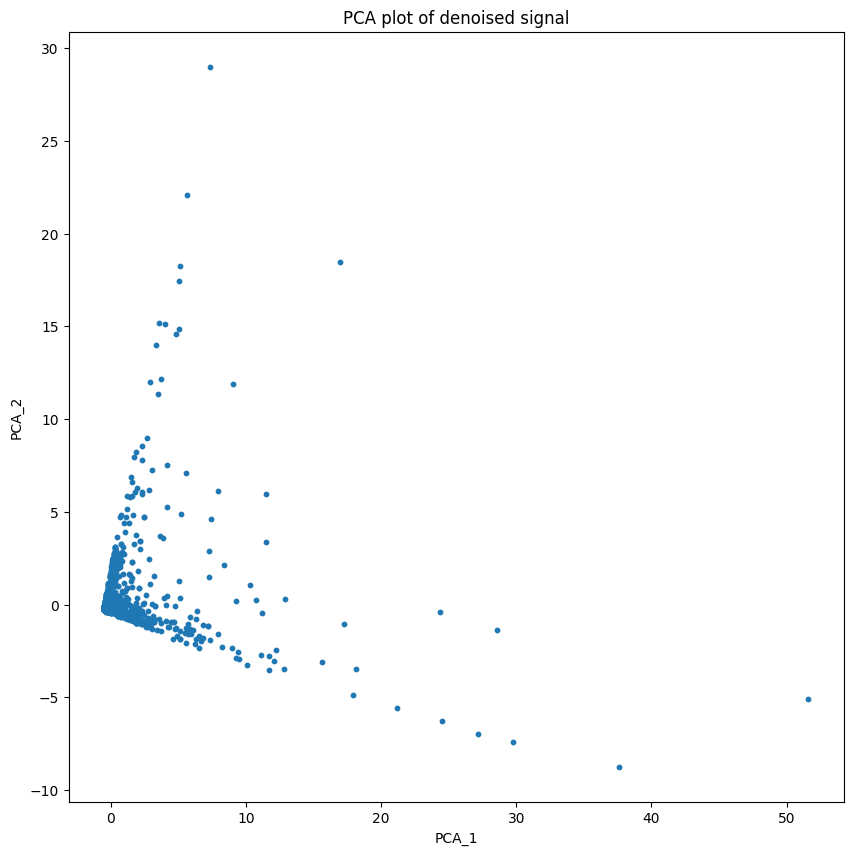

In [18]:
dup_denoised_acc_x_axis_3 = denoised_acc_x_axis - denoised_acc_x_axis.mean()
dup_denoised_acc_y_axis_3= denoised_acc_y_axis - denoised_acc_y_axis.mean()
dup_denoised_acc_z_axis_3 = denoised_acc_z_axis - denoised_acc_z_axis.mean()
dup_denoised_gyro_z_axis_3 = denoised_gyro_z_axis - denoised_gyro_z_axis.mean()
dup_denoised_gyro_y_axis_3 = denoised_gyro_y_axis - denoised_gyro_y_axis.mean()
dup_denoised_gyro_x_axis_3 = denoised_gyro_x_axis - denoised_gyro_x_axis.mean()

abs_dup_denoised_acc_x_axis_3 = dup_denoised_acc_x_axis_3.abs()
abs_dup_denoised_acc_y_axis_3 = dup_denoised_acc_y_axis_3.abs()
abs_dup_denoised_acc_z_axis_3 = dup_denoised_acc_z_axis_3.abs()
abs_dup_denoised_gyro_z_axis_3 = dup_denoised_gyro_z_axis_3.abs()
abs_dup_denoised_gyro_y_axis_3 = dup_denoised_gyro_y_axis_3.abs()
abs_dup_denoised_gyro_x_axis_3 = dup_denoised_gyro_x_axis_3.abs()

dup_gyro = pd.concat([abs_dup_denoised_gyro_x_axis_3, abs_dup_denoised_gyro_y_axis_3,abs_dup_denoised_gyro_z_axis_3], axis=1)
dup_acc = pd.concat([abs_dup_denoised_acc_x_axis_3,abs_dup_denoised_acc_y_axis_3,abs_dup_denoised_acc_x_axis_3],axis=1)
dup = pd.concat([dup_acc,dup_gyro],axis=1)

X1 = pca_scaler(dup)
fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams['font.family'] = 'serif'
plt.scatter(X1[:,0],X1[:,1],s=10)
plt.title('PCA plot of denoised signal')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()

# Ploting of Denoised Data

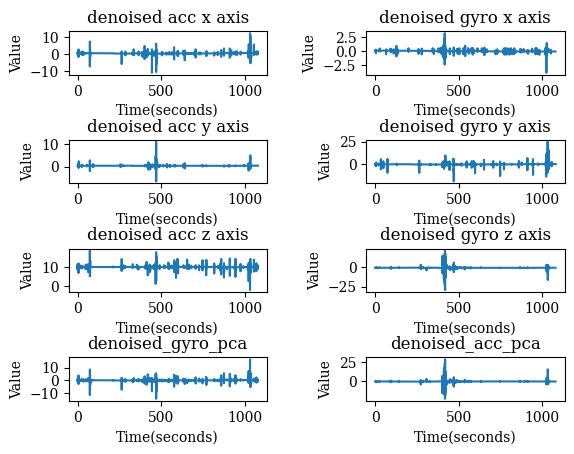

In [19]:
#benchydefect
%matplotlib inline
plt.subplot(4, 2, 1)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_1,denoised_acc_x_axis, 'denoised acc x axis')
plt.subplot(4, 2, 2)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_1,denoised_gyro_x_axis, 'denoised gyro x axis')
plt.subplot(4, 2, 3)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_1,denoised_acc_y_axis, 'denoised acc y axis')
plt.subplot(4, 2, 4)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_1,denoised_gyro_y_axis, 'denoised gyro y axis')
plt.subplot(4, 2, 5)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_1,denoised_acc_z_axis, 'denoised acc z axis')
plt.subplot(4, 2, 6)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_1,denoised_gyro_z_axis, 'denoised gyro z axis')
plt.subplot(4, 2, 7)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_1,denoised_acc_pca, 'denoised_gyro_pca')
plt.subplot(4, 2, 8)
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plot(dataset_1,denoised_gyro_pca, 'denoised_acc_pca')
plt.show()

# Replicating Graphs in the Paper

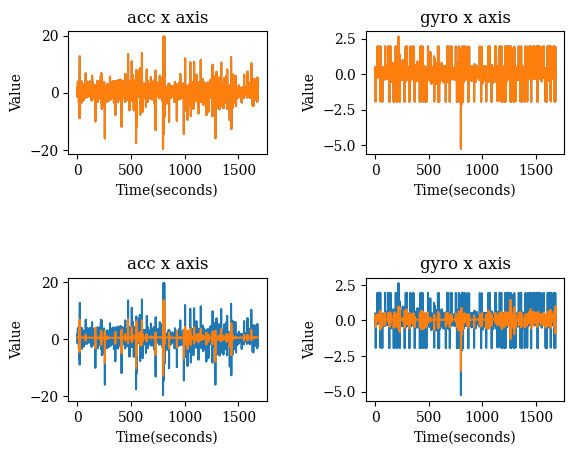

In [20]:

%matplotlib inline
#noise and denoise graphs

plt.subplot(2,2,1)
plt.subplots_adjust(wspace=0.5, hspace=1)
plot(dataset_3,acc_x_axis_3,'acc x axis')
plot(dataset_3,acc_x_axis_3,'acc x axis')
plt.subplot(2,2,2)
plt.subplots_adjust(wspace=0.5, hspace=1)
plot(dataset_3,gyro_x_axis_3, 'gyro x axis')
plot(dataset_3,gyro_x_axis_3, 'gyro x axis')
plt.subplot(2,2,3)
plt.subplots_adjust(wspace=0.5, hspace=1)
plot(dataset_3,acc_x_axis_3, 'acc x axis')
plot(dataset_3,denoised_acc_x_axis_3, 'acc x axis')
plt.subplot(2,2,4)
plt.subplots_adjust(wspace=0.5, hspace=1)
plot(dataset_3,gyro_x_axis_3, 'gyro x axis')
plot(dataset_3,denoised_gyro_x_axis_3, 'gyro x axis')
plt.show()



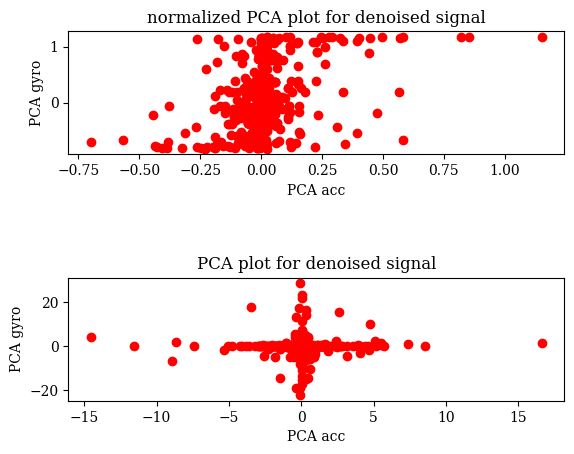

In [21]:
%matplotlib inline
#benchydefect


##pca

#normalized
plt.subplot(2,1,1)
plt.subplots_adjust(wspace=0.5, hspace=1)
plt.plot(normalized_denoised_acc_pca, normalized_denoised_gyro_pca, 'ro')
plt.xlabel('PCA acc')
plt.ylabel('PCA gyro')
plt.title('normalized PCA plot for denoised signal')

#regular
plt.subplot(2,1,2)
plt.subplots_adjust(wspace=0.5, hspace=1)
plt.plot(denoised_acc_pca, denoised_gyro_pca, 'ro')
plt.xlabel('PCA acc')
plt.ylabel('PCA gyro')
plt.title('PCA plot for denoised signal')
plt.show()


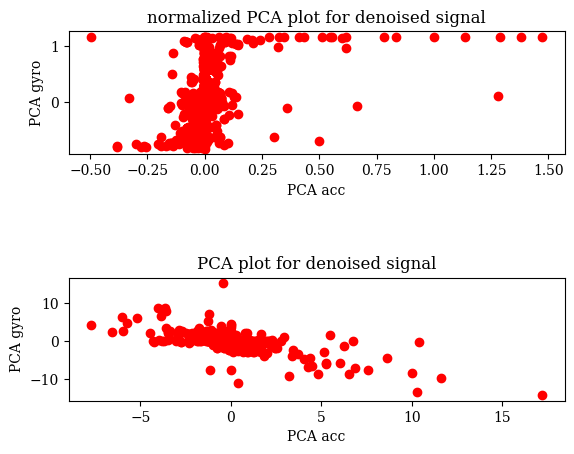

In [22]:
%matplotlib inline
#normalbenchy


##pca

#normalized
plt.subplot(2,1,1)
plt.subplots_adjust(wspace=0.5, hspace=1)
plt.plot(normalized_denoised_acc_pca_2, normalized_denoised_gyro_pca_2, 'ro')
plt.xlabel('PCA acc')
plt.ylabel('PCA gyro')
plt.title('normalized PCA plot for denoised signal')

#regular
plt.subplot(2,1,2)
plt.subplots_adjust(wspace=0.5, hspace=1)
plt.plot(denoised_acc_pca_2, denoised_gyro_pca_2, 'ro')
plt.xlabel('PCA acc')
plt.ylabel('PCA gyro')
plt.title('PCA plot for denoised signal')
plt.show()


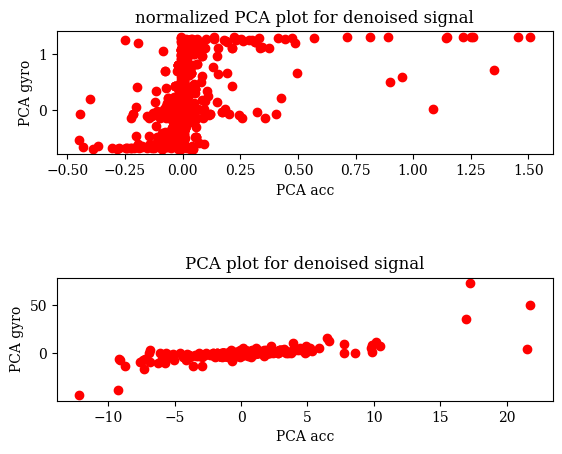

In [23]:
%matplotlib inline
#SensorDataFile


##pca

#normalized
plt.subplot(2,1,1)
plt.subplots_adjust(wspace=0.5, hspace=1)
plt.plot(normalized_denoised_acc_pca_3, normalized_denoised_gyro_pca_3, 'ro')
plt.xlabel('PCA acc')
plt.ylabel('PCA gyro')
plt.title('normalized PCA plot for denoised signal')

#regular
plt.subplot(2,1,2)
plt.subplots_adjust(wspace=0.5, hspace=1)
plt.plot(denoised_acc_pca_3, denoised_gyro_pca_3, 'ro')
plt.xlabel('PCA acc')
plt.ylabel('PCA gyro')
plt.title('PCA plot for denoised signal')
plt.show()


# concat data

In [24]:
Training_Data_acc_xy = pd.concat([denoised_acc_x_axis, denoised_acc_y_axis], axis=1)
Testing_Data_acc_xy = pd.concat([denoised_acc_x_axis_2, denoised_acc_y_axis_2], axis=1)
Validation_Data_acc_xy = pd.concat([denoised_acc_x_axis_3, denoised_acc_y_axis_3], axis=1)

normalized_Training_Data_acc_xy =  normalize(Training_Data_acc_xy, norm='l2')
normalized_Testing_Data_acc_xy =  normalize(Testing_Data_acc_xy, norm='l2')
normalized_Validation_Data_acc_xy=  normalize(Validation_Data_acc_xy, norm='l2')

Training_Data_acc_yz = pd.concat([denoised_acc_z_axis, denoised_acc_y_axis], axis=1)
Testing_Data_acc_yz = pd.concat([denoised_acc_z_axis_2, denoised_acc_y_axis_2], axis=1)
Validation_Data_acc_yz = pd.concat([denoised_acc_z_axis_3, denoised_acc_y_axis_3], axis=1)

normalized_Training_Data_acc_yz =  normalize(Training_Data_acc_yz, norm='l2')
normalized_Testing_Data_acc_yz =  normalize(Testing_Data_acc_yz, norm='l2')
normalized_Validation_Data_acc_yz=  normalize(Validation_Data_acc_yz, norm='l2')

Training_Data_acc_xz = pd.concat([denoised_acc_z_axis, denoised_acc_x_axis], axis=1)
Testing_Data_acc_xz = pd.concat([denoised_acc_z_axis_2, denoised_acc_x_axis_2], axis=1)
Validation_Data_acc_xz = pd.concat([denoised_acc_z_axis_3, denoised_acc_x_axis_3], axis=1)

normalized_Training_Data_acc_xz =  normalize(Training_Data_acc_xz, norm='l2')
normalized_Testing_Data_acc_xz =  normalize(Testing_Data_acc_xz, norm='l2')
normalized_Validation_Data_acc_xz=  normalize(Validation_Data_acc_xz, norm='l2')

In [25]:
Training_Data_gyro_xy = pd.concat([denoised_gyro_x_axis, denoised_gyro_y_axis], axis=1)
Testing_Data_gyro_xy = pd.concat([denoised_gyro_x_axis_2, denoised_gyro_y_axis_2], axis=1)
Validation_Data_gyro_xy = pd.concat([denoised_gyro_x_axis_3, denoised_gyro_y_axis_3], axis=1)

normalized_Training_Data_gyro_xy =  normalize(Training_Data_gyro_xy, norm='l2')
normalized_Testing_Data_gyro_xy =  normalize(Testing_Data_gyro_xy, norm='l2')
normalized_Validation_Data_gyro_xy=  normalize(Validation_Data_gyro_xy, norm='l2')

Training_Data_gyro_yz = pd.concat([denoised_gyro_z_axis, denoised_gyro_y_axis], axis=1)
Testing_Data_gyro_yz = pd.concat([denoised_gyro_z_axis_2, denoised_gyro_y_axis_2], axis=1)
Validation_Data_gyro_yz = pd.concat([denoised_gyro_z_axis_3, denoised_gyro_y_axis_3], axis=1)

normalized_Training_Data_gyro_yz =  normalize(Training_Data_gyro_yz, norm='l2')
normalized_Testing_Data_gyro_yz =  normalize(Testing_Data_gyro_yz, norm='l2')
normalized_Validation_Data_gyro_yz=  normalize(Validation_Data_gyro_yz, norm='l2')

Training_Data_gyro_xz = pd.concat([denoised_gyro_z_axis, denoised_gyro_x_axis], axis=1)
Testing_Data_gyro_xz = pd.concat([denoised_gyro_z_axis_2, denoised_gyro_x_axis_2], axis=1)
Validation_Data_gyro_xz = pd.concat([denoised_gyro_z_axis_3, denoised_gyro_x_axis_3], axis=1)

normalized_Training_Data_gyro_xz =  normalize(Training_Data_gyro_xz, norm='l2')
normalized_Testing_Data_gyro_xz =  normalize(Testing_Data_gyro_xz, norm='l2')
normalized_Validation_Data_gyro_xz=  normalize(Validation_Data_gyro_xz, norm='l2')

In [26]:
#all data
Training_Data_all_data = pd.concat([denoised_acc_x_axis, denoised_acc_y_axis,denoised_acc_z_axis,denoised_gyro_x_axis, denoised_gyro_y_axis,denoised_gyro_z_axis], axis=1)
Testing_Data_all_data = pd.concat([denoised_acc_x_axis_2, denoised_acc_y_axis_2,denoised_acc_z_axis_2,denoised_gyro_x_axis_2, denoised_gyro_y_axis_2,denoised_gyro_z_axis_2], axis=1)
Validation_Data_all_data = pd.concat([denoised_acc_x_axis_3, denoised_acc_y_axis_3,denoised_acc_z_axis_3,denoised_gyro_x_axis_3, denoised_gyro_y_axis_3,denoised_gyro_z_axis_3], axis=1)

normalized_Training_Data_all_data =  normalize(Training_Data_all_data, norm='l2')
normalized_Testing_Data_all_data =  normalize(Testing_Data_all_data, norm='l2')
normalized_Validation_Data_all_data=  normalize(Validation_Data_all_data, norm='l2')

In [27]:
#all data minus z

Training_Data_all_data_minus_z = pd.concat([denoised_acc_x_axis, denoised_acc_y_axis,denoised_gyro_x_axis, denoised_gyro_y_axis], axis=1)
Testing_Data_all_data_minus_z = pd.concat([denoised_acc_x_axis_2, denoised_acc_y_axis_2,denoised_gyro_x_axis_2, denoised_gyro_y_axis_2], axis=1)
Validation_Data_all_data_minus_z = pd.concat([denoised_acc_x_axis_3, denoised_acc_y_axis_3,denoised_gyro_x_axis_3, denoised_gyro_y_axis_3], axis=1)

normalized_Training_Data_all_data_minus_z =  normalize(Training_Data_all_data_minus_z, norm='l2')
normalized_Testing_Data_all_data_minus_z =  normalize(Testing_Data_all_data_minus_z, norm='l2')
normalized_Validation_Data_all_data_minus_z=  normalize(Validation_Data_all_data_minus_z, norm='l2')


In [28]:
#all data minus y
Training_Data_all_data_minus_y = pd.concat([denoised_acc_x_axis, denoised_acc_z_axis,denoised_gyro_x_axis, denoised_gyro_z_axis], axis=1)
Testing_Data_all_data_minus_y = pd.concat([denoised_acc_x_axis_2, denoised_acc_z_axis_2,denoised_gyro_x_axis_2, denoised_gyro_z_axis_2], axis=1)
Validation_Data_all_data_minus_y = pd.concat([denoised_acc_x_axis_3, denoised_acc_z_axis_3,denoised_gyro_x_axis_3, denoised_gyro_z_axis_3], axis=1)

normalized_Training_Data_all_data_minus_y =  normalize(Training_Data_all_data_minus_y, norm='l2')
normalized_Testing_Data_all_data_minus_y =  normalize(Testing_Data_all_data_minus_y, norm='l2')
normalized_Validation_Data_all_data_minus_y=  normalize(Validation_Data_all_data_minus_y, norm='l2')

In [29]:
#all data minus x
Training_Data_all_data_minus_x = pd.concat([denoised_acc_y_axis, denoised_acc_z_axis,denoised_gyro_y_axis, denoised_gyro_z_axis], axis=1)
Testing_Data_all_data_minus_x = pd.concat([denoised_acc_y_axis_2, denoised_acc_z_axis_2,denoised_gyro_y_axis_2, denoised_gyro_z_axis_2], axis=1)
Validation_Data_all_data_minus_x = pd.concat([denoised_acc_y_axis_3, denoised_acc_z_axis_3,denoised_gyro_y_axis_3, denoised_gyro_z_axis_3], axis=1)

normalized_Training_Data_all_data_minus_x =  normalize(Training_Data_all_data_minus_x, norm='l2')
normalized_Testing_Data_all_data_minus_x =  normalize(Testing_Data_all_data_minus_x, norm='l2')
normalized_Validation_Data_all_data_minus_x=  normalize(Validation_Data_all_data_minus_x, norm='l2')

In [30]:
#just z
Training_Data_z = pd.concat([denoised_acc_z_axis, denoised_gyro_z_axis], axis=1)
Testing_Data_z = pd.concat([ denoised_acc_z_axis_2, denoised_gyro_z_axis_2], axis=1)
Validation_Data_z = pd.concat([ denoised_acc_z_axis_3, denoised_gyro_z_axis_3], axis=1)

normalized_Training_Data_z =  normalize(Training_Data_z, norm='l2')
normalized_Testing_Data_z =  normalize(Testing_Data_z, norm='l2')
normalized_Validation_Data_z=  normalize(Validation_Data_z, norm='l2')

# One Class SVM

In [31]:
#making data for One class SVM
Training_Data = pd.concat([normalized_denoised_acc_pca, normalized_denoised_gyro_pca], axis=1)
Testing_Data = pd.concat([normalized_denoised_acc_pca_2, normalized_denoised_gyro_pca_2], axis=1)
Validation_Data = pd.concat([normalized_denoised_acc_pca_3, normalized_denoised_gyro_pca_3], axis=1)

# Model

In [32]:
# Fit the model
OC_SVM = svm.OneClassSVM(nu=0.04, kernel="rbf", gamma=0.01)
OC_SVM.fit(Training_Data)

# Predictions
y_pred_train = OC_SVM.predict(Training_Data)
y_pred_test = OC_SVM.predict(Testing_Data)
y_pred_validation = OC_SVM.predict(Validation_Data)

In [33]:
y_pred_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [34]:
#converting 1's to 0's and -1's to 1
y_pred_train_temp = np.where(y_pred_train > 0, 0, y_pred_train )
y_pred_train_converted = np.where(y_pred_train_temp < 0 ,  1 , y_pred_train_temp)

y_pred_test_temp = np.where(y_pred_test > 0, 0, y_pred_test )
y_pred_test_converted = np.where(y_pred_test_temp < 0 ,  1 , y_pred_test_temp)

y_pred_validation_temp = np.where(y_pred_validation > 0, 0, y_pred_validation )
y_pred_validation_converted = np.where(y_pred_validation_temp < 0 ,  1 , y_pred_validation_temp)

In [35]:
label_nparray = label.to_numpy()
label_nparray_2 = label_2.to_numpy()
label_nparray_3 = label_3.to_numpy()

# Confusion Matrix

In [36]:
conf_matrix_training = confusion_matrix(label_nparray, y_pred_train_converted)
print("Confusion Matrix training data:")
print(conf_matrix_training)
print('training accuracy = ' )
print((conf_matrix_training[0,0]+conf_matrix_training[1,1])/np.sum(conf_matrix_training))

conf_matrix_testing = confusion_matrix(label_nparray_2, y_pred_test_converted)
print("Confusion Matrix training data:")
print(conf_matrix_testing)
print('testing accuracy = ' )
print((conf_matrix_testing[0,0]+conf_matrix_testing[1,1])/np.sum(conf_matrix_testing))

conf_matrix_validation = confusion_matrix(label_nparray_3, y_pred_validation_converted)
print("Confusion Matrix training data:")
print(conf_matrix_validation)
print('validation accuracy = ' )
print((conf_matrix_validation[0,0]+conf_matrix_validation[1,1])/np.sum(conf_matrix_validation))


Confusion Matrix training data:
[[4488  112]
 [ 394   94]]
training accuracy = 
0.9005503144654088
Confusion Matrix training data:
[[7733  254]
 [   0    0]]
testing accuracy = 
0.9681983222736947
Confusion Matrix training data:
[[7479  193]
 [ 238   57]]
validation accuracy = 
0.9459018451110832


In [37]:
#number of outlying points
outliers = np.sum(label==1)
outliers
print(outliers)

488


acc xy

In [38]:

OC_SVM = svm.OneClassSVM(nu=0.03, kernel="rbf", gamma=0.09)
OC_SVM.fit(normalized_Training_Data_acc_xy)

# Predictions
y_pred_train_acc_xy = OC_SVM.predict(normalized_Training_Data_acc_xy)
y_pred_test_acc_xy = OC_SVM.predict(normalized_Testing_Data_acc_xy)
y_pred_validation_acc_xy = OC_SVM.predict(normalized_Validation_Data_acc_xy)

#converting 1's to 0's and -1's to 1
y_pred_train_temp_acc_xy = np.where(y_pred_train_acc_xy > 0, 0, y_pred_train_acc_xy )
y_pred_train_converted_acc_xy = np.where(y_pred_train_temp_acc_xy < 0 ,  1 , y_pred_train_temp_acc_xy)

y_pred_test_temp_acc_xy = np.where(y_pred_test_acc_xy > 0, 0, y_pred_test_acc_xy )
y_pred_test_converted_acc_xy = np.where(y_pred_test_temp_acc_xy< 0 ,  1 , y_pred_test_temp_acc_xy)

y_pred_validation_temp_acc_xy = np.where(y_pred_validation_acc_xy > 0, 0, y_pred_validation_acc_xy )
y_pred_validation_converted_acc_xy = np.where(y_pred_validation_temp_acc_xy < 0 ,  1 , y_pred_validation_temp_acc_xy)

conf_matrix_training_acc_xy = confusion_matrix(label_nparray, y_pred_train_converted_acc_xy)
print("Confusion Matrix training data:")
print(conf_matrix_training_acc_xy)
print('training accuracy = ' )
print((conf_matrix_training_acc_xy[0,0]+conf_matrix_training_acc_xy[1,1])/np.sum(conf_matrix_training_acc_xy))

conf_matrix_testing_acc_xy = confusion_matrix(label_nparray_2, y_pred_test_converted_acc_xy)
print("Confusion Matrix training data:")
print(conf_matrix_testing_acc_xy)
print('testing accuracy = ' )
print((conf_matrix_testing_acc_xy[0,0]+conf_matrix_testing_acc_xy[1,1])/np.sum(conf_matrix_testing_acc_xy))

conf_matrix_validation_acc_xy = confusion_matrix(label_nparray_3, y_pred_validation_converted_acc_xy)
print("Confusion Matrix training data:")
print(conf_matrix_validation_acc_xy)
print('validation accuracy = ' )
print((conf_matrix_validation_acc_xy[0,0]+conf_matrix_validation_acc_xy[1,1])/np.sum(conf_matrix_validation_acc_xy))

Confusion Matrix training data:
[[4515   85]
 [ 420   68]]
training accuracy = 
0.9007468553459119
Confusion Matrix training data:
[[7832  155]
 [   0    0]]
testing accuracy = 
0.9805934643796169
Confusion Matrix training data:
[[7513  159]
 [ 224   71]]
validation accuracy = 
0.9519266976277143


acc yz

In [39]:
OC_SVM = svm.OneClassSVM(nu=0.03, kernel="rbf", gamma=0.09)
OC_SVM.fit(normalized_Training_Data_acc_yz)

# Predictions
y_pred_train_acc_yz = OC_SVM.predict(normalized_Training_Data_acc_yz)
y_pred_test_acc_yz = OC_SVM.predict(normalized_Testing_Data_acc_yz)
y_pred_validation_acc_yz = OC_SVM.predict(normalized_Validation_Data_acc_yz)

#converting 1's to 0's and -1's to 1
y_pred_train_temp_acc_yz = np.where(y_pred_train_acc_yz > 0, 0, y_pred_train_acc_yz )
y_pred_train_converted_acc_yz = np.where(y_pred_train_temp_acc_yz < 0 ,  1 , y_pred_train_temp_acc_yz)

y_pred_test_temp_acc_yz = np.where(y_pred_test_acc_yz > 0, 0, y_pred_test_acc_yz )
y_pred_test_converted_acc_yz = np.where(y_pred_test_temp_acc_yz< 0 ,  1 , y_pred_test_temp_acc_yz)

y_pred_validation_temp_acc_yz = np.where(y_pred_validation_acc_yz > 0, 0, y_pred_validation_acc_yz )
y_pred_validation_converted_acc_yz = np.where(y_pred_validation_temp_acc_yz < 0 ,  1 , y_pred_validation_temp_acc_yz)

conf_matrix_training_acc_yz = confusion_matrix(label_nparray, y_pred_train_converted_acc_yz)
print("Confusion Matrix training data:")
print(conf_matrix_training_acc_yz)
print('training accuracy = ' )
print((conf_matrix_training_acc_yz[0,0]+conf_matrix_training_acc_yz[1,1])/np.sum(conf_matrix_training_acc_yz))

conf_matrix_testing_acc_yz = confusion_matrix(label_nparray_2, y_pred_test_converted_acc_yz)
print("Confusion Matrix training data:")
print(conf_matrix_testing_acc_yz)
print('testing accuracy = ' )
print((conf_matrix_testing_acc_yz[0,0]+conf_matrix_testing_acc_yz[1,1])/np.sum(conf_matrix_testing_acc_yz))

conf_matrix_validation_acc_yz = confusion_matrix(label_nparray_3, y_pred_validation_converted_acc_yz)
print("Confusion Matrix training data:")
print(conf_matrix_validation_acc_yz)
print('validation accuracy = ' )
print((conf_matrix_validation_acc_yz[0,0]+conf_matrix_validation_acc_yz[1,1])/np.sum(conf_matrix_validation_acc_yz))

Confusion Matrix training data:
[[4498  102]
 [ 436   52]]
training accuracy = 
0.8942610062893082
Confusion Matrix training data:
[[7873  114]
 [   0    0]]
testing accuracy = 
0.9857268060598473
Confusion Matrix training data:
[[7518  154]
 [ 223   72]]
validation accuracy = 
0.9526798041922933


acc xz



In [40]:
OC_SVM = svm.OneClassSVM(nu=0.03, kernel="rbf", gamma=0.09)
OC_SVM.fit(normalized_Training_Data_acc_xz)

# Predictions
y_pred_train_acc_xz = OC_SVM.predict(normalized_Training_Data_acc_xz)
y_pred_test_acc_xz = OC_SVM.predict(normalized_Testing_Data_acc_xz)
y_pred_validation_acc_xz = OC_SVM.predict(normalized_Validation_Data_acc_xz)

#converting 1's to 0's and -1's to 1
y_pred_train_temp_acc_xz = np.where(y_pred_train_acc_xz > 0, 0, y_pred_train_acc_xz )
y_pred_train_converted_acc_xz = np.where(y_pred_train_temp_acc_xz < 0 ,  1 , y_pred_train_temp_acc_xz)

y_pred_test_temp_acc_xz = np.where(y_pred_test_acc_xz > 0, 0, y_pred_test_acc_xz )
y_pred_test_converted_acc_xz = np.where(y_pred_test_temp_acc_xz< 0 ,  1 , y_pred_test_temp_acc_xz)

y_pred_validation_temp_acc_xz = np.where(y_pred_validation_acc_xz > 0, 0, y_pred_validation_acc_xz )
y_pred_validation_converted_acc_xz = np.where(y_pred_validation_temp_acc_xz < 0 ,  1 , y_pred_validation_temp_acc_xz)

conf_matrix_training_acc_xz = confusion_matrix(label_nparray, y_pred_train_converted_acc_xz)
print("Confusion Matrix training data:")
print(conf_matrix_training_acc_xz)
print('training accuracy = ' )
print((conf_matrix_training_acc_xz[0,0]+conf_matrix_training_acc_xz[1,1])/np.sum(conf_matrix_training_acc_xz))

conf_matrix_testing_acc_xz = confusion_matrix(label_nparray_2, y_pred_test_converted_acc_xz)
print("Confusion Matrix training data:")
print(conf_matrix_testing_acc_xz)
print('testing accuracy = ' )
print((conf_matrix_testing_acc_xz[0,0]+conf_matrix_testing_acc_xz[1,1])/np.sum(conf_matrix_testing_acc_xz))

conf_matrix_validation_acc_xz = confusion_matrix(label_nparray_3, y_pred_validation_converted_acc_xz)
print("Confusion Matrix training data:")
print(conf_matrix_validation_acc_xz)
print('validation accuracy = ' )
print((conf_matrix_validation_acc_xz[0,0]+conf_matrix_validation_acc_xz[1,1])/np.sum(conf_matrix_validation_acc_xz))

Confusion Matrix training data:
[[4505   95]
 [ 429   59]]
training accuracy = 
0.8970125786163522
Confusion Matrix training data:
[[7811  176]
 [   0    0]]
testing accuracy = 
0.977964191811694
Confusion Matrix training data:
[[7528  144]
 [ 250   45]]
validation accuracy = 
0.9505460022593197


gyro xy


In [41]:
OC_SVM = svm.OneClassSVM(nu=0.009, kernel="rbf", gamma=0.004)
OC_SVM.fit(normalized_Training_Data_gyro_xy)

# Predictions
y_pred_train_gyro_xy = OC_SVM.predict(normalized_Training_Data_gyro_xy)
y_pred_test_gyro_xy = OC_SVM.predict(normalized_Testing_Data_gyro_xy)
y_pred_validation_gyro_xy = OC_SVM.predict(normalized_Validation_Data_gyro_xy)

#converting 1's to 0's and -1's to 1
y_pred_train_temp_gyro_xy = np.where(y_pred_train_gyro_xy > 0, 0, y_pred_train_gyro_xy )
y_pred_train_converted_gyro_xy = np.where(y_pred_train_temp_gyro_xy < 0 ,  1 , y_pred_train_temp_gyro_xy)

y_pred_test_temp_gyro_xy = np.where(y_pred_test_gyro_xy > 0, 0, y_pred_test_gyro_xy )
y_pred_test_converted_gyro_xy = np.where(y_pred_test_temp_gyro_xy< 0 ,  1 , y_pred_test_temp_gyro_xy)

y_pred_validation_temp_gyro_xy = np.where(y_pred_validation_gyro_xy > 0, 0, y_pred_validation_gyro_xy )
y_pred_validation_converted_gyro_xy = np.where(y_pred_validation_temp_gyro_xy < 0 ,  1 , y_pred_validation_temp_gyro_xy)

conf_matrix_training_gyro_xy = confusion_matrix(label_nparray, y_pred_train_converted_gyro_xy)
print("Confusion Matrix training data:")
print(conf_matrix_training_gyro_xy)
print('training accuracy = ' )
print((conf_matrix_training_gyro_xy[0,0]+conf_matrix_training_gyro_xy[1,1])/np.sum(conf_matrix_training_gyro_xy))

conf_matrix_testing_gyro_xy = confusion_matrix(label_nparray_2, y_pred_test_converted_gyro_xy)
print("Confusion Matrix training data:")
print(conf_matrix_testing_gyro_xy)
print('testing accuracy = ' )
print((conf_matrix_testing_gyro_xy[0,0]+conf_matrix_testing_gyro_xy[1,1])/np.sum(conf_matrix_testing_gyro_xy))

conf_matrix_validation_gyro_xy = confusion_matrix(label_nparray_3, y_pred_validation_converted_gyro_xy)
print("Confusion Matrix training data:")
print(conf_matrix_validation_gyro_xy)
print('validation accuracy = ' )
print((conf_matrix_validation_gyro_xy[0,0]+conf_matrix_validation_gyro_xy[1,1])/np.sum(conf_matrix_validation_gyro_xy))

Confusion Matrix training data:
[[4153  447]
 [ 462   26]]
training accuracy = 
0.8213443396226415
Confusion Matrix training data:
[[7829  158]
 [   0    0]]
testing accuracy = 
0.9802178540127707
Confusion Matrix training data:
[[7519  153]
 [ 283   12]]
validation accuracy = 
0.9452742563072675


gyro yz

In [42]:
OC_SVM = svm.OneClassSVM(nu=0.009, kernel="rbf", gamma=0.004)
OC_SVM.fit(normalized_Training_Data_gyro_yz)

# Predictions
y_pred_train_gyro_yz = OC_SVM.predict(normalized_Training_Data_gyro_yz)
y_pred_test_gyro_yz = OC_SVM.predict(normalized_Testing_Data_gyro_yz)
y_pred_validation_gyro_yz = OC_SVM.predict(normalized_Validation_Data_gyro_yz)

#converting 1's to 0's and -1's to 1
y_pred_train_temp_gyro_yz = np.where(y_pred_train_gyro_yz > 0, 0, y_pred_train_gyro_yz )
y_pred_train_converted_gyro_yz = np.where(y_pred_train_temp_gyro_yz < 0 ,  1 , y_pred_train_temp_gyro_yz)

y_pred_test_temp_gyro_yz = np.where(y_pred_test_gyro_yz > 0, 0, y_pred_test_gyro_yz )
y_pred_test_converted_gyro_yz = np.where(y_pred_test_temp_gyro_yz< 0 ,  1 , y_pred_test_temp_gyro_yz)

y_pred_validation_temp_gyro_yz = np.where(y_pred_validation_gyro_yz > 0, 0, y_pred_validation_gyro_yz )
y_pred_validation_converted_gyro_yz = np.where(y_pred_validation_temp_gyro_yz < 0 ,  1 , y_pred_validation_temp_gyro_yz)

conf_matrix_training_gyro_yz = confusion_matrix(label_nparray, y_pred_train_converted_gyro_yz)
print("Confusion Matrix training data:")
print(conf_matrix_training_gyro_yz)
print('training accuracy = ' )
print((conf_matrix_training_gyro_yz[0,0]+conf_matrix_training_gyro_yz[1,1])/np.sum(conf_matrix_training_gyro_yz))

conf_matrix_testing_gyro_yz = confusion_matrix(label_nparray_2, y_pred_test_converted_gyro_yz)
print("Confusion Matrix training data:")
print(conf_matrix_testing_gyro_yz)
print('testing accuracy = ' )
print((conf_matrix_testing_gyro_yz[0,0]+conf_matrix_testing_gyro_yz[1,1])/np.sum(conf_matrix_testing_gyro_yz))

conf_matrix_validation_gyro_yz = confusion_matrix(label_nparray_3, y_pred_validation_converted_gyro_yz)
print("Confusion Matrix training data:")
print(conf_matrix_validation_gyro_yz)
print('validation accuracy = ' )
print((conf_matrix_validation_gyro_yz[0,0]+conf_matrix_validation_gyro_yz[1,1])/np.sum(conf_matrix_validation_gyro_yz))

Confusion Matrix training data:
[[4471  129]
 [ 386  102]]
training accuracy = 
0.8987814465408805
Confusion Matrix training data:
[[7705  282]
 [   0    0]]
testing accuracy = 
0.9646926255164643
Confusion Matrix training data:
[[7398  274]
 [ 228   67]]
validation accuracy = 
0.9369900840968997


gyro xz

In [43]:
OC_SVM = svm.OneClassSVM(nu=0.009, kernel="rbf", gamma=0.004)
OC_SVM.fit(normalized_Training_Data_gyro_xz)

# Predictions
y_pred_train_gyro_xz = OC_SVM.predict(normalized_Training_Data_gyro_xz)
y_pred_test_gyro_xz = OC_SVM.predict(normalized_Testing_Data_gyro_xz)
y_pred_validation_gyro_xz = OC_SVM.predict(normalized_Validation_Data_gyro_xz)

#converting 1's to 0's and -1's to 1
y_pred_train_temp_gyro_xz = np.where(y_pred_train_gyro_xz > 0, 0, y_pred_train_gyro_xz )
y_pred_train_converted_gyro_xz = np.where(y_pred_train_temp_gyro_xz < 0 ,  1 , y_pred_train_temp_gyro_xz)

y_pred_test_temp_gyro_xz = np.where(y_pred_test_gyro_xz > 0, 0, y_pred_test_gyro_xz )
y_pred_test_converted_gyro_xz = np.where(y_pred_test_temp_gyro_xz< 0 ,  1 , y_pred_test_temp_gyro_xz)

y_pred_validation_temp_gyro_xz = np.where(y_pred_validation_gyro_xz > 0, 0, y_pred_validation_gyro_xz )
y_pred_validation_converted_gyro_xz = np.where(y_pred_validation_temp_gyro_xz < 0 ,  1 , y_pred_validation_temp_gyro_xz)

conf_matrix_training_gyro_xz = confusion_matrix(label_nparray, y_pred_train_converted_gyro_xz)
print("Confusion Matrix training data:")
print(conf_matrix_training_gyro_xz)
print('training accuracy = ' )
print((conf_matrix_training_gyro_xz[0,0]+conf_matrix_training_gyro_xz[1,1])/np.sum(conf_matrix_training_gyro_xz))

conf_matrix_testing_gyro_xz = confusion_matrix(label_nparray_2, y_pred_test_converted_gyro_xz)
print("Confusion Matrix training data:")
print(conf_matrix_testing_gyro_xz)
print('testing accuracy = ' )
print((conf_matrix_testing_gyro_xz[0,0]+conf_matrix_testing_gyro_xz[1,1])/np.sum(conf_matrix_testing_gyro_xz))

conf_matrix_validation_gyro_xz = confusion_matrix(label_nparray_3, y_pred_validation_converted_gyro_xz)
print("Confusion Matrix training data:")
print(conf_matrix_validation_gyro_xz)
print('validation accuracy = ' )
print((conf_matrix_validation_gyro_xz[0,0]+conf_matrix_validation_gyro_xz[1,1])/np.sum(conf_matrix_validation_gyro_xz))

Confusion Matrix training data:
[[4482  118]
 [ 433   55]]
training accuracy = 
0.8917059748427673
Confusion Matrix training data:
[[7780  207]
 [   0    0]]
testing accuracy = 
0.9740828846876174
Confusion Matrix training data:
[[7525  147]
 [ 277   18]]
validation accuracy = 
0.9467804694364252


all data

In [44]:
OC_SVM = svm.OneClassSVM(nu=0.005, kernel="rbf", gamma=0.05)
OC_SVM.fit(normalized_Training_Data_all_data)

# Predictions
y_pred_train_all_data = OC_SVM.predict(normalized_Training_Data_all_data)
y_pred_test_all_data = OC_SVM.predict(normalized_Testing_Data_all_data)
y_pred_validation_all_data = OC_SVM.predict(normalized_Validation_Data_all_data)

#converting 1's to 0's and -1's to 1
y_pred_train_temp_all_data = np.where(y_pred_train_all_data > 0, 0, y_pred_train_all_data )
y_pred_train_converted_all_data = np.where(y_pred_train_temp_all_data < 0 ,  1 , y_pred_train_temp_all_data)

y_pred_test_temp_all_data = np.where(y_pred_test_all_data > 0, 0, y_pred_test_all_data )
y_pred_test_converted_all_data = np.where(y_pred_test_temp_all_data< 0 ,  1 , y_pred_test_temp_all_data)

y_pred_validation_temp_all_data = np.where(y_pred_validation_all_data > 0, 0, y_pred_validation_all_data )
y_pred_validation_converted_all_data = np.where(y_pred_validation_temp_all_data < 0 ,  1 , y_pred_validation_temp_all_data)

conf_matrix_training_all_data = confusion_matrix(label_nparray, y_pred_train_converted_all_data)
print("Confusion Matrix training data:")
print(conf_matrix_training_all_data)
print('training accuracy = ' )
print((conf_matrix_training_all_data[0,0]+conf_matrix_training_all_data[1,1])/np.sum(conf_matrix_training_all_data))

conf_matrix_testing_all_data = confusion_matrix(label_nparray_2, y_pred_test_converted_all_data)
print("Confusion Matrix training data:")
print(conf_matrix_testing_all_data)
print('testing accuracy = ' )
print((conf_matrix_testing_all_data[0,0]+conf_matrix_testing_all_data[1,1])/np.sum(conf_matrix_testing_all_data))

conf_matrix_validation_all_data = confusion_matrix(label_nparray_3, y_pred_validation_converted_all_data)
print("Confusion Matrix training data:")
print(conf_matrix_validation_all_data)
print('validation accuracy = ' )
print((conf_matrix_validation_all_data[0,0]+conf_matrix_validation_all_data[1,1])/np.sum(conf_matrix_validation_all_data))

Confusion Matrix training data:
[[4599    1]
 [ 464   24]]
training accuracy = 
0.9086084905660378
Confusion Matrix training data:
[[7977   10]
 [   0    0]]
testing accuracy = 
0.9987479654438463
Confusion Matrix training data:
[[7660   12]
 [ 277   18]]
validation accuracy = 
0.9637253671394502


# Local Outlier Factor

In [45]:
lof = LocalOutlierFactor(n_neighbors=100, contamination=0.04)
lof_pred_training = lof.fit_predict(Training_Data)
lof_pred_test = lof.fit_predict(Testing_Data)
lof_pred_validation = lof.fit_predict(Validation_Data)

In [46]:
#converting 1's to 0's and -1's to 1
lof_pred_train_temp = np.where(lof_pred_training > 0, 0, lof_pred_training )
lof_pred_train_converted = np.where(lof_pred_train_temp < 0 ,  1 , lof_pred_train_temp)

lof_pred_test_temp = np.where(lof_pred_test > 0, 0, lof_pred_test )
lof_pred_test_converted = np.where(lof_pred_test_temp < 0 ,  1 , lof_pred_test_temp)

lof_pred_validation_temp = np.where(lof_pred_validation > 0, 0, lof_pred_validation )
lof_pred_validation_converted = np.where(lof_pred_validation_temp < 0 ,  1 , lof_pred_validation_temp)

In [47]:
label_nparray = label.to_numpy()
label_nparray_2 = label_2.to_numpy()
label_nparray_3 = label_3.to_numpy()

In [48]:
lof_conf_matrix_training = confusion_matrix(label_nparray, lof_pred_train_converted)
print("Confusion Matrix training data:")
print(lof_conf_matrix_training)
print('training accuracy = ' )
print((lof_conf_matrix_training[0,0]+lof_conf_matrix_training[1,1])/np.sum(lof_conf_matrix_training))

lof_conf_matrix_testing = confusion_matrix(label_nparray_2, lof_pred_test_converted)
print("Confusion Matrix training data:")
print(lof_conf_matrix_testing)
print('testing accuracy = ' )
print((lof_conf_matrix_testing[0,0]+lof_conf_matrix_testing[1,1])/np.sum(lof_conf_matrix_testing))

lof_conf_matrix_validation = confusion_matrix(label_nparray_3, lof_pred_validation_converted)
print("Confusion Matrix training data:")
print(lof_conf_matrix_validation)
print('validation accuracy = ' )
print((lof_conf_matrix_validation[0,0]+lof_conf_matrix_validation[1,1])/np.sum(lof_conf_matrix_validation))

Confusion Matrix training data:
[[4438  162]
 [ 449   39]]
training accuracy = 
0.8799135220125787
Confusion Matrix training data:
[[7670  317]
 [   0    0]]
testing accuracy = 
0.9603105045699262
Confusion Matrix training data:
[[7401  271]
 [ 247   48]]
validation accuracy = 
0.9349817999246893


all data


In [49]:
lof = LocalOutlierFactor(n_neighbors=200, contamination=0.01)
lof_pred_training_all_data = lof.fit_predict(Training_Data_all_data)
lof_pred_test_all_data = lof.fit_predict(Testing_Data_all_data)
lof_pred_validation_all_data = lof.fit_predict(Validation_Data_all_data)

#converting 1's to 0's and -1's to 1
lof_pred_train_temp_all_data = np.where(lof_pred_training_all_data > 0, 0, lof_pred_training_all_data )
lof_pred_train_converted_all_data = np.where(lof_pred_train_temp_all_data < 0 ,  1 , lof_pred_train_temp_all_data)

lof_pred_test_temp_all_data = np.where(lof_pred_test_all_data > 0, 0, lof_pred_test_all_data )
lof_pred_test_converted_all_data = np.where(lof_pred_test_temp_all_data < 0 ,  1 , lof_pred_test_temp_all_data)

lof_pred_validation_temp_all_data = np.where(lof_pred_validation_all_data > 0, 0, lof_pred_validation_all_data )
lof_pred_validation_converted_all_data = np.where(lof_pred_validation_temp_all_data < 0 ,  1 , lof_pred_validation_temp_all_data)

lof_conf_matrix_training_all_data = confusion_matrix(label_nparray, lof_pred_train_converted_all_data)
print("Confusion Matrix training data:")
print(lof_conf_matrix_training_all_data)
print('training accuracy = ' )
print((lof_conf_matrix_training_all_data[0,0]+lof_conf_matrix_training_all_data[1,1])/np.sum(lof_conf_matrix_training_all_data))

lof_conf_matrix_testing_all_data = confusion_matrix(label_nparray_2, lof_pred_test_converted_all_data)
print("Confusion Matrix training data:")
print(lof_conf_matrix_testing_all_data)
print('testing accuracy = ' )
print((lof_conf_matrix_testing_all_data[0,0]+lof_conf_matrix_testing_all_data[1,1])/np.sum(lof_conf_matrix_testing_all_data))

lof_conf_matrix_validation_all_data = confusion_matrix(label_nparray_3, lof_pred_validation_converted_all_data)
print("Confusion Matrix training data:")
print(lof_conf_matrix_validation_all_data)
print('validation accuracy = ' )
print((lof_conf_matrix_validation_all_data[0,0]+lof_conf_matrix_validation_all_data[1,1])/np.sum(lof_conf_matrix_validation_all_data))

Confusion Matrix training data:
[[4554   46]
 [ 483    5]]
training accuracy = 
0.8960298742138365
Confusion Matrix training data:
[[7912   75]
 [   0    0]]
testing accuracy = 
0.9906097408288469
Confusion Matrix training data:
[[7624   48]
 [ 267   28]]
validation accuracy = 
0.9604619053596084


In [50]:
lof = LocalOutlierFactor(n_neighbors=200, contamination=0.01)
lof_pred_training_z = lof.fit_predict(Training_Data_z)
lof_pred_test_z = lof.fit_predict(Testing_Data_z)
lof_pred_validation_z = lof.fit_predict(Validation_Data_z)

#converting 1's to 0's and -1's to 1
lof_pred_train_temp_z = np.where(lof_pred_training_z > 0, 0, lof_pred_training_z )
lof_pred_train_converted_z = np.where(lof_pred_train_temp_z < 0 ,  1 , lof_pred_train_temp_z)

lof_pred_test_temp_z = np.where(lof_pred_test_z > 0, 0, lof_pred_test_z )
lof_pred_test_converted_z = np.where(lof_pred_test_temp_z < 0 ,  1 , lof_pred_test_temp_z)

lof_pred_validation_temp_z = np.where(lof_pred_validation_z > 0, 0, lof_pred_validation_z )
lof_pred_validation_converted_z = np.where(lof_pred_validation_temp_z < 0 ,  1 , lof_pred_validation_temp_z)

lof_conf_matrix_training_z = confusion_matrix(label_nparray, lof_pred_train_converted_z)
print("Confusion Matrix training data:")
print(lof_conf_matrix_training_z)
print('training accuracy = ' )
print((lof_conf_matrix_training_z[0,0]+lof_conf_matrix_training_z[1,1])/np.sum(lof_conf_matrix_training_z))

lof_conf_matrix_testing_z = confusion_matrix(label_nparray_2, lof_pred_test_converted_z)
print("Confusion Matrix training data:")
print(lof_conf_matrix_testing_z)
print('testing accuracy = ' )
print((lof_conf_matrix_testing_z[0,0]+lof_conf_matrix_testing_z[1,1])/np.sum(lof_conf_matrix_testing_z))

lof_conf_matrix_validation_z = confusion_matrix(label_nparray_3, lof_pred_validation_converted_z)
print("Confusion Matrix training data:")
print(lof_conf_matrix_validation_z)
print('validation accuracy = ' )
print((lof_conf_matrix_validation_z[0,0]+lof_conf_matrix_validation_z[1,1])/np.sum(lof_conf_matrix_validation_z))

Confusion Matrix training data:
[[4549   51]
 [ 488    0]]
training accuracy = 
0.894064465408805
Confusion Matrix training data:
[[7920   67]
 [   0    0]]
testing accuracy = 
0.9916113684737698
Confusion Matrix training data:
[[7613   59]
 [ 275   20]]
validation accuracy = 
0.9580770679051086


# SVM


In [51]:
svm_var = svm.SVC(kernel= 'poly', degree = 2)
svm_var.fit(Training_Data,label_nparray)

svm_pred_training = svm_var.predict(Training_Data)
svm_pred_testing = svm_var.predict(Testing_Data)
svm_pred_validation = svm_var.predict(Validation_Data)


In [52]:
svm_conf_matrix_training = confusion_matrix(label_nparray, svm_pred_training)
print("Confusion Matrix training data:")
print(svm_conf_matrix_training)
print('training accuracy = ' )
print((svm_conf_matrix_training[0,0]+svm_conf_matrix_training[1,1])/np.sum(svm_conf_matrix_training))

svm_conf_matrix_testing = confusion_matrix(label_nparray_2, svm_pred_testing)
print("Confusion Matrix testing data:")
print(svm_conf_matrix_testing)
print('testing accuracy = ' )
print((svm_conf_matrix_testing[0,0]+svm_conf_matrix_testing[1,1])/np.sum(svm_conf_matrix_testing))

svm_conf_matrix_validation = confusion_matrix(label_nparray_3, svm_pred_validation)
print("Confusion Matrix validation data:")
print(svm_conf_matrix_validation)
print('validation accuracy = ' )
print((svm_conf_matrix_validation[0,0]+svm_conf_matrix_validation[1,1])/np.sum(svm_conf_matrix_validation))

Confusion Matrix training data:
[[4594    6]
 [ 475   13]]
training accuracy = 
0.9054638364779874
Confusion Matrix testing data:
[[7969   18]
 [   0    0]]
testing accuracy = 
0.9977463377989233
Confusion Matrix validation data:
[[7655   17]
 [ 287    8]]
validation accuracy = 
0.961842600728003


all data

In [53]:

# tp = np.zeros(30)
# fp = np.zeros(30)
# fn = np.zeros(30)
# tn = np.zeros(30)
# for i in range(30):
#     if i == 0:
#         pass
#     else:
#         svm_var = svm.SVC(kernel= 'poly', degree = i+1)
#         svm_var.fit(normalized_Training_Data_all_data,label_nparray)

#         svm_pred_training_all_data = svm_var.predict(normalized_Training_Data_all_data)
#         svm_pred_testing_all_data = svm_var.predict(normalized_Testing_Data_all_data)
#         svm_pred_validation_all_data = svm_var.predict(normalized_Validation_Data_all_data)

#         svm_conf_matrix_training_all_data = confusion_matrix(label_nparray, svm_pred_training_all_data)
#         # print("Confusion Matrix training data:")
#         # print(svm_conf_matrix_training_all_data)
#         # print('training accuracy = ' )
#         # print((svm_conf_matrix_training_all_data[0,0]+svm_conf_matrix_training_all_data[1,1])/np.sum(svm_conf_matrix_training_all_data))

#         svm_conf_matrix_testing_all_data = confusion_matrix(label_nparray_2, svm_pred_testing_all_data)
#         # print("Confusion Matrix testing data:")
#         # print(svm_conf_matrix_testing_all_data)
#         # print('testing accuracy = ' )
#         # print((svm_conf_matrix_testing_all_data[0,0]+svm_conf_matrix_testing_all_data[1,1])/np.sum(svm_conf_matrix_testing_all_data))

#         svm_conf_matrix_validation_all_data = confusion_matrix(label_nparray_3, svm_pred_validation_all_data)
#         # print("Confusion Matrix validation data:")
#         # print(svm_conf_matrix_validation_all_data)
#         # print('validation accuracy = ' )
#         # print((svm_conf_matrix_validation_all_data[0,0]+svm_conf_matrix_validation_all_data[1,1])/np.sum(svm_conf_matrix_validation_all_data))

#     # tp[i] = svm_conf_matrix_validation_all_data[0,0]
#     fp[i] = svm_conf_matrix_validation_all_data[0,1]
#     fn[i] = svm_conf_matrix_validation_all_data[1,0]
#     tn[i] = svm_conf_matrix_validation_all_data[1,1]
#     print(i)

# # plt.plot(tp)
# plt.plot(fp)
# plt.plot(fn)
# plt.plot(tn)

In [54]:

# plt.plot(fp)
# plt.plot(fn)
# plt.plot(tn)
# plt.show()

In [55]:
svm_var = svm.SVC(kernel= 'poly', degree = 24)
svm_var.fit(normalized_Training_Data_all_data,label_nparray)

svm_pred_training_all_data = svm_var.predict(normalized_Training_Data_all_data)
svm_pred_testing_all_data = svm_var.predict(normalized_Testing_Data_all_data)
svm_pred_validation_all_data = svm_var.predict(normalized_Validation_Data_all_data)

svm_conf_matrix_training_all_data = confusion_matrix(label_nparray, svm_pred_training_all_data)
print("Confusion Matrix training data:")
print(svm_conf_matrix_training_all_data)
print('training accuracy = ' )
print((svm_conf_matrix_training_all_data[0,0]+svm_conf_matrix_training_all_data[1,1])/np.sum(svm_conf_matrix_training_all_data))

svm_conf_matrix_testing_all_data = confusion_matrix(label_nparray_2, svm_pred_testing_all_data)
print("Confusion Matrix testing data:")
print(svm_conf_matrix_testing_all_data)
print('testing accuracy = ' )
print((svm_conf_matrix_testing_all_data[0,0]+svm_conf_matrix_testing_all_data[1,1])/np.sum(svm_conf_matrix_testing_all_data))

svm_conf_matrix_validation_all_data = confusion_matrix(label_nparray_3, svm_pred_validation_all_data)
print("Confusion Matrix validation data:")
print(svm_conf_matrix_validation_all_data)
print('validation accuracy = ' )
print((svm_conf_matrix_validation_all_data[0,0]+svm_conf_matrix_validation_all_data[1,1])/np.sum(svm_conf_matrix_validation_all_data))


Confusion Matrix training data:
[[4594    6]
 [ 335  153]]
training accuracy = 
0.9329795597484277
Confusion Matrix testing data:
[[7964   23]
 [   0    0]]
testing accuracy = 
0.9971203205208464
Confusion Matrix validation data:
[[7633   39]
 [ 192  103]]
validation accuracy = 
0.9710053972637128


minus_z

In [56]:
# tp_minus_z = np.zeros(40)
# fp_minus_z = np.zeros(40)
# fn_minus_z = np.zeros(40)
# tn_minus_z= np.zeros(40)
# for i in range(40):
#     if i == 0:
#         pass
#     else:
#         svm_var = svm.SVC(kernel= 'poly', degree = i+1)
#         svm_var.fit(normalized_Training_Data_all_data_minus_z,label_nparray)

#         svm_pred_training_all_data_minus_z = svm_var.predict(normalized_Training_Data_all_data_minus_z)
#         svm_pred_testing_all_data_minus_z = svm_var.predict(normalized_Testing_Data_all_data_minus_z)
#         svm_pred_validation_all_data_minuz_z = svm_var.predict(normalized_Validation_Data_all_data_minus_z)

#         svm_conf_matrix_training_all_data_minus_z = confusion_matrix(label_nparray, svm_pred_training_all_data_minus_z)
#         # print("Confusion Matrix training data:")
#         # print(svm_conf_matrix_training_all_data)
#         # print('training accuracy = ' )
#         # print((svm_conf_matrix_training_all_data[0,0]+svm_conf_matrix_training_all_data[1,1])/np.sum(svm_conf_matrix_training_all_data))

#         svm_conf_matrix_testing_all_data_minus_z = confusion_matrix(label_nparray_2, svm_pred_testing_all_data_minus_z)
#         # print("Confusion Matrix testing data:")
#         # print(svm_conf_matrix_testing_all_data)
#         # print('testing accuracy = ' )
#         # print((svm_conf_matrix_testing_all_data[0,0]+svm_conf_matrix_testing_all_data[1,1])/np.sum(svm_conf_matrix_testing_all_data))

#         svm_conf_matrix_validation_all_data_minus_z = confusion_matrix(label_nparray_3, svm_pred_validation_all_data_minuz_z)
#         # print("Confusion Matrix validation data:")
#         # print(svm_conf_matrix_validation_all_data)
#         # print('validation accuracy = ' )
#         # print((svm_conf_matrix_validation_all_data[0,0]+svm_conf_matrix_validation_all_data[1,1])/np.sum(svm_conf_matrix_validation_all_data))

#     # tp[i] = svm_conf_matrix_validation_all_data[0,0]
#     fp_minus_z[i] = svm_conf_matrix_validation_all_data_minus_z[0,1]
#     fn_minus_z[i] = svm_conf_matrix_validation_all_data_minus_z[1,0]
#     tn_minus_z[i] = svm_conf_matrix_validation_all_data_minus_z[1,1]
#     print(i)

# # plt.plot(tp)
# plt.plot(fp_minus_z)
# plt.plot(fn_minus_z)
# plt.plot(tn_minus_z)
# plt.show()

In [57]:
# %matplotlib inline
# plt.plot(fp_minus_z)
# plt.plot(fn_minus_z)
# plt.plot(tn_minus_z)
# plt.show()

In [58]:

svm_var = svm.SVC(kernel= 'poly', degree = 20)
svm_var.fit(normalized_Training_Data_all_data_minus_z,label_nparray)

svm_pred_training_all_data_minus_z = svm_var.predict(normalized_Training_Data_all_data_minus_z)
svm_pred_testing_all_data_minus_z = svm_var.predict(normalized_Testing_Data_all_data_minus_z)
svm_pred_validation_all_data_minus_z = svm_var.predict(normalized_Validation_Data_all_data_minus_z)

svm_conf_matrix_training_all_data_minus_z = confusion_matrix(label_nparray, svm_pred_training_all_data_minus_z)
print("Confusion Matrix training data:")
print(svm_conf_matrix_training_all_data_minus_z)
print('training accuracy = ' )
print((svm_conf_matrix_training_all_data_minus_z[0,0]+svm_conf_matrix_training_all_data_minus_z[1,1])/np.sum(svm_conf_matrix_training_all_data_minus_z))

svm_conf_matrix_testing_all_data_minus_z = confusion_matrix(label_nparray_2, svm_pred_testing_all_data_minus_z)
print("Confusion Matrix testing data:")
print(svm_conf_matrix_testing_all_data_minus_z)
print('testing accuracy = ' )
print((svm_conf_matrix_testing_all_data_minus_z[0,0]+svm_conf_matrix_testing_all_data_minus_z[1,1])/np.sum(svm_conf_matrix_testing_all_data_minus_z))

svm_conf_matrix_validation_all_data_minus_z = confusion_matrix(label_nparray_3, svm_pred_validation_all_data_minus_z)
print("Confusion Matrix validation data:")
print(svm_conf_matrix_validation_all_data_minus_z)
print('validation accuracy = ' )
print((svm_conf_matrix_validation_all_data_minus_z[0,0]+svm_conf_matrix_validation_all_data_minus_z[1,1])/np.sum(svm_conf_matrix_validation_all_data_minus_z))

Confusion Matrix training data:
[[4581   19]
 [ 278  210]]
training accuracy = 
0.941627358490566
Confusion Matrix testing data:
[[7767  220]
 [   0    0]]
testing accuracy = 
0.9724552397646175
Confusion Matrix validation data:
[[7254  418]
 [ 235   60]]
validation accuracy = 
0.9180369022216643


minus_y


In [59]:
# tp_minus_y = np.zeros(50)
# fp_minus_y = np.zeros(50)
# fn_minus_y = np.zeros(50)
# tn_minus_y= np.zeros(50)
# svm_conf_matrix_validation_all_data_minus_y = np.zeros((2,2))
# for i in range(50):
#     if i == 0:
#         pass
#     else:
#         svm_var = svm.SVC(kernel= 'poly', degree = i+1)
#         svm_var.fit(normalized_Training_Data_all_data_minus_y,label_nparray)

#         svm_pred_training_all_data_minus_y = svm_var.predict(normalized_Training_Data_all_data_minus_y)
#         svm_pred_testing_all_data_minus_y = svm_var.predict(normalized_Testing_Data_all_data_minus_y)
#         svm_pred_validation_all_data_minus_y = svm_var.predict(normalized_Validation_Data_all_data_minus_y)

#         svm_conf_matrix_training_all_data_minus_y = confusion_matrix(label_nparray, svm_pred_training_all_data_minus_y)
#         # print("Confusion Matrix training data:")
#         # print(svm_conf_matrix_training_all_data)
#         # print('training accuracy = ' )
#         # print((svm_conf_matrix_training_all_data[0,0]+svm_conf_matrix_training_all_data[1,1])/np.sum(svm_conf_matrix_training_all_data))

#         svm_conf_matrix_testing_all_data_minus_y = confusion_matrix(label_nparray_2, svm_pred_testing_all_data_minus_y)
#         # print("Confusion Matrix testing data:")
#         # print(svm_conf_matrix_testing_all_data)
#         # print('testing accuracy = ' )
#         # print((svm_conf_matrix_testing_all_data[0,0]+svm_conf_matrix_testing_all_data[1,1])/np.sum(svm_conf_matrix_testing_all_data))

#         svm_conf_matrix_validation_all_data_minus_y = confusion_matrix(label_nparray_3, svm_pred_validation_all_data_minus_y)
#         # print("Confusion Matrix validation data:")
#         # print(svm_conf_matrix_validation_all_data)
#         # print('validation accuracy = ' )
#         # print((svm_conf_matrix_validation_all_data[0,0]+svm_conf_matrix_validation_all_data[1,1])/np.sum(svm_conf_matrix_validation_all_data))

#     # tp[i] = svm_conf_matrix_validation_all_data[0,0]
#     fp_minus_y[i] = svm_conf_matrix_validation_all_data_minus_y[0,1]
#     fn_minus_y[i] = svm_conf_matrix_validation_all_data_minus_y[1,0]
#     tn_minus_y[i] = svm_conf_matrix_validation_all_data_minus_y[1,1]
#     print(i)

# # plt.plot(tp)
# plt.plot(fp_minus_y)
# plt.plot(fn_minus_y)
# plt.plot(tn_minus_y)

In [60]:
svm_var = svm.SVC(kernel= 'poly', degree = 20)
svm_var.fit(normalized_Training_Data_all_data_minus_y,label_nparray)

svm_pred_training_all_data_minus_y = svm_var.predict(normalized_Training_Data_all_data_minus_y)
svm_pred_testing_all_data_minus_y = svm_var.predict(normalized_Testing_Data_all_data_minus_y)
svm_pred_validation_all_data_minus_y = svm_var.predict(normalized_Validation_Data_all_data_minus_y)

svm_conf_matrix_training_all_data_minus_y = confusion_matrix(label_nparray, svm_pred_training_all_data_minus_y)
print("Confusion Matrix training data:")
print(svm_conf_matrix_training_all_data_minus_y)
print('training accuracy = ' )
print((svm_conf_matrix_training_all_data_minus_y[0,0]+svm_conf_matrix_training_all_data_minus_y[1,1])/np.sum(svm_conf_matrix_training_all_data_minus_y))

svm_conf_matrix_testing_all_data_minus_y = confusion_matrix(label_nparray_2, svm_pred_testing_all_data_minus_y)
print("Confusion Matrix testing data:")
print(svm_conf_matrix_testing_all_data_minus_y)
print('testing accuracy = ' )
print((svm_conf_matrix_testing_all_data_minus_y[0,0]+svm_conf_matrix_testing_all_data_minus_y[1,1])/np.sum(svm_conf_matrix_testing_all_data_minus_y))

svm_conf_matrix_validation_all_data_minus_y = confusion_matrix(label_nparray_3, svm_pred_validation_all_data_minus_y)
print("Confusion Matrix validation data:")
print(svm_conf_matrix_validation_all_data_minus_y)
print('validation accuracy = ' )
print((svm_conf_matrix_validation_all_data_minus_y[0,0]+svm_conf_matrix_validation_all_data_minus_y[1,1])/np.sum(svm_conf_matrix_validation_all_data_minus_y))

Confusion Matrix training data:
[[4586   14]
 [ 366  122]]
training accuracy = 
0.925314465408805
Confusion Matrix testing data:
[[7977   10]
 [   0    0]]
testing accuracy = 
0.9987479654438463
Confusion Matrix validation data:
[[7647   25]
 [ 202   93]]
validation accuracy = 
0.9715074683067654


minus_x

In [61]:
# tp_minus_x = np.zeros(50)
# fp_minus_x = np.zeros(50)
# fn_minus_x = np.zeros(50)
# tn_minus_x= np.zeros(50)
# svm_conf_matrix_validation_all_data_minus_x = np.zeros((2,2))
# for i in range(50):
#     if i == 0:
#         pass
#     else:
#         svm_var = svm.SVC(kernel= 'poly', degree = i+1)
#         svm_var.fit(normalized_Training_Data_all_data_minus_x,label_nparray)

#         svm_pred_training_all_data_minus_x = svm_var.predict(normalized_Training_Data_all_data_minus_x)
#         svm_pred_testing_all_data_minus_x = svm_var.predict(normalized_Testing_Data_all_data_minus_x)
#         svm_pred_validation_all_data_minus_x = svm_var.predict(normalized_Validation_Data_all_data_minus_x)

#         svm_conf_matrix_training_all_data_minus_x = confusion_matrix(label_nparray, svm_pred_training_all_data_minus_x)
#         # print("Confusion Matrix training data:")
#         # print(svm_conf_matrix_training_all_data)
#         # print('training accuracy = ' )
#         # print((svm_conf_matrix_training_all_data[0,0]+svm_conf_matrix_training_all_data[1,1])/np.sum(svm_conf_matrix_training_all_data))

#         svm_conf_matrix_testing_all_data_minus_x = confusion_matrix(label_nparray_2, svm_pred_testing_all_data_minus_x)
#         # print("Confusion Matrix testing data:")
#         # print(svm_conf_matrix_testing_all_data)
#         # print('testing accuracy = ' )
#         # print((svm_conf_matrix_testing_all_data[0,0]+svm_conf_matrix_testing_all_data[1,1])/np.sum(svm_conf_matrix_testing_all_data))

#         svm_conf_matrix_validation_all_data_minus_x = confusion_matrix(label_nparray_3, svm_pred_validation_all_data_minus_x)
#         # print("Confusion Matrix validation data:")
#         # print(svm_conf_matrix_validation_all_data)
#         # print('validation accuracy = ' )
#         # print((svm_conf_matrix_validation_all_data[0,0]+svm_conf_matrix_validation_all_data[1,1])/np.sum(svm_conf_matrix_validation_all_data))

#     # tp[i] = svm_conf_matrix_validation_all_data[0,0]
#     fp_minus_x[i] = svm_conf_matrix_validation_all_data_minus_x[0,1]
#     fn_minus_x[i] = svm_conf_matrix_validation_all_data_minus_x[1,0]
#     tn_minus_x[i] = svm_conf_matrix_validation_all_data_minus_x[1,1]
#     print(i)

# # plt.plot(tp)
# plt.plot(fp_minus_x)
# plt.plot(fn_minus_x)
# plt.plot(tn_minus_x)

In [62]:
svm_var = svm.SVC(kernel= 'poly', degree = 28)
svm_var.fit(normalized_Training_Data_all_data_minus_x,label_nparray)

svm_pred_training_all_data_minus_x = svm_var.predict(normalized_Training_Data_all_data_minus_x)
svm_pred_testing_all_data_minus_x = svm_var.predict(normalized_Testing_Data_all_data_minus_x)
svm_pred_validation_all_data_minus_x = svm_var.predict(normalized_Validation_Data_all_data_minus_x)

svm_conf_matrix_training_all_data_minus_x = confusion_matrix(label_nparray, svm_pred_training_all_data_minus_x)
print("Confusion Matrix training data:")
print(svm_conf_matrix_training_all_data_minus_x)
print('training accuracy = ' )
print((svm_conf_matrix_training_all_data_minus_x[0,0]+svm_conf_matrix_training_all_data_minus_x[1,1])/np.sum(svm_conf_matrix_training_all_data_minus_x))

svm_conf_matrix_testing_all_data_minus_x = confusion_matrix(label_nparray_2, svm_pred_testing_all_data_minus_x)
print("Confusion Matrix testing data:")
print(svm_conf_matrix_testing_all_data_minus_x)
print('testing accuracy = ' )
print((svm_conf_matrix_testing_all_data_minus_x[0,0]+svm_conf_matrix_testing_all_data_minus_x[1,1])/np.sum(svm_conf_matrix_testing_all_data_minus_x))

svm_conf_matrix_validation_all_data_minus_x = confusion_matrix(label_nparray_3, svm_pred_validation_all_data_minus_x)
print("Confusion Matrix validation data:")
print(svm_conf_matrix_validation_all_data_minus_x)
print('validation accuracy = ' )
print((svm_conf_matrix_validation_all_data_minus_x[0,0]+svm_conf_matrix_validation_all_data_minus_x[1,1])/np.sum(svm_conf_matrix_validation_all_data_minus_x))

Confusion Matrix training data:
[[4598    2]
 [ 342  146]]
training accuracy = 
0.9323899371069182
Confusion Matrix testing data:
[[7959   28]
 [   0    0]]
testing accuracy = 
0.9964943032427696
Confusion Matrix validation data:
[[7642   30]
 [ 193  102]]
validation accuracy = 
0.972009539349818


just z


In [63]:

# tp_z = np.zeros(45)
# fp_z = np.zeros(45)
# fn_z = np.zeros(45)
# tn_z= np.zeros(45)
# svm_conf_matrix_validation_z = np.zeros((2,2))
# for i in range(45):
#     if i == 0:
#         pass
#     else:
#         svm_var = svm.SVC(kernel= 'poly', degree = i+1)
#         svm_var.fit(normalized_Training_Data_z,label_nparray)

#         svm_pred_training_z = svm_var.predict(normalized_Training_Data_z)
#         svm_pred_testing_z = svm_var.predict(normalized_Testing_Data_z)
#         svm_pred_validation_z = svm_var.predict(normalized_Validation_Data_z)

#         svm_conf_matrix_training_z = confusion_matrix(label_nparray, svm_pred_training_z)
#         # print("Confusion Matrix training data:")
#         # print(svm_conf_matrix_training_all_data)
#         # print('training accuracy = ' )
#         # print((svm_conf_matrix_training_all_data[0,0]+svm_conf_matrix_training_all_data[1,1])/np.sum(svm_conf_matrix_training_all_data))

#         svm_conf_matrix_testing_z = confusion_matrix(label_nparray_2, svm_pred_testing_z)
#         # print("Confusion Matrix testing data:")
#         # print(svm_conf_matrix_testing_all_data)
#         # print('testing accuracy = ' )
#         # print((svm_conf_matrix_testing_all_data[0,0]+svm_conf_matrix_testing_all_data[1,1])/np.sum(svm_conf_matrix_testing_all_data))

#         svm_conf_matrix_validation_z = confusion_matrix(label_nparray_3, svm_pred_validation_z)
#         # print("Confusion Matrix validation data:")
#         # print(svm_conf_matrix_validation_all_data)
#         # print('validation accuracy = ' )
#         # print((svm_conf_matrix_validation_all_data[0,0]+svm_conf_matrix_validation_all_data[1,1])/np.sum(svm_conf_matrix_validation_all_data))

#     # tp[i] = svm_conf_matrix_validation_all_data[0,0]
#     fp_z[i] = svm_conf_matrix_validation_z[0,1]
#     fn_z[i] = svm_conf_matrix_validation_z[1,0]
#     tn_z[i] = svm_conf_matrix_validation_z[1,1]
#     print(i)
    

# # plt.plot(tp)
# plt.plot(fp_z)
# plt.plot(fn_z)
# plt.plot(tn_z)

In [64]:
svm_var = svm.SVC(kernel= 'poly', degree = 35)
svm_var.fit(normalized_Training_Data_z,label_nparray)

svm_pred_training_z = svm_var.predict(normalized_Training_Data_z)
svm_pred_testing_z = svm_var.predict(normalized_Testing_Data_z)
svm_pred_validation_z = svm_var.predict(normalized_Validation_Data_z)

svm_conf_matrix_training_z = confusion_matrix(label_nparray, svm_pred_training_z)
print("Confusion Matrix training data:")
print(svm_conf_matrix_training_z)
print('training accuracy = ' )
print((svm_conf_matrix_training_z[0,0]+svm_conf_matrix_training_z[1,1])/np.sum(svm_conf_matrix_training_z))

svm_conf_matrix_testing_z = confusion_matrix(label_nparray_2, svm_pred_testing_z)
print("Confusion Matrix testing data:")
print(svm_conf_matrix_testing_z)
print('testing accuracy = ' )
print((svm_conf_matrix_testing_z[0,0]+svm_conf_matrix_testing_z[1,1])/np.sum(svm_conf_matrix_testing_z))

svm_conf_matrix_validation_z = confusion_matrix(label_nparray_3, svm_pred_validation_z)
print("Confusion Matrix validation data:")
print(svm_conf_matrix_validation_z)
print('validation accuracy = ' )
print((svm_conf_matrix_validation_z[0,0]+svm_conf_matrix_validation_z[1,1])/np.sum(svm_conf_matrix_validation_z))

Confusion Matrix training data:
[[4570   30]
 [ 358  130]]
training accuracy = 
0.9237421383647799
Confusion Matrix testing data:
[[7967   20]
 [   0    0]]
testing accuracy = 
0.9974959308876925
Confusion Matrix validation data:
[[7633   39]
 [ 188  107]]
validation accuracy = 
0.9715074683067654


# LSTM

In [65]:

Training_Data_nparray = Training_Data.to_numpy()
Testing_Data_nparray = Testing_Data.to_numpy()
Validation_Data_nparray = Validation_Data.to_numpy()

Training_data_all_data_nparray = Training_Data_all_data.to_numpy()
Testing_Data_all_data_nparray = Testing_Data_all_data.to_numpy()
Validation_Data_all_data_nparray = Validation_Data_all_data.to_numpy()

In [66]:
# TIME_STEPS = 10  # Number of contiguous data values per sequence
# N_FEATURES = 6   # Number of features

# # Normalize the training data (optional)
# # You can skip this step if your data is already normalized


# # Create sequences
# def create_sequences_data(Training_Data_all_data_nparray, time_steps):
#     X, y = [], []
#     for i in range(0,len(Training_Data_nparray) - time_steps,2):
#         X.append(Training_Data_nparray[i : i + time_steps])
#         y.append(Training_Data_nparray[i + time_steps])
#     return np.array(X)

# def create_sequences_label(Training_Data_nparray, time_steps):
#     X, y = [], []
#     for i in range(0,len(Training_Data_nparray) - time_steps,2):
#         y.append(Training_Data_nparray[i + time_steps])
#     return np.array(y)

# print("yellow")
# X_train_seq = create_sequences_data(Training_data_all_data_nparray, TIME_STEPS)
# y_train_seq = create_sequences_label(label_nparray, TIME_STEPS)

# x_test_seq = create_sequences_data(Testing_Data_all_data_nparray, TIME_STEPS)
# y_test_seq = create_sequences_label(label_nparray_2, TIME_STEPS)

# x_validation_seq = create_sequences_data(Validation_Data_all_data_nparray, TIME_STEPS)
# y_validation_seq = create_sequences_label(label_nparray_3, TIME_STEPS)

# X_train, X_test, y_train, y_test = train_test_split(X_train_seq, y_train_seq, test_size=0.2, random_state=42)
# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(units=128, activation='relu', input_shape=(TIME_STEPS, N_FEATURES)))
# model.add(Dropout(rate=0.5))
# model.add(Dense(units=64, activation='relu'))  # Additional dense layer
# model.add(Dense(units=1, activation='sigmoid'))  # Output layer (binary classification)

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model on the training data
# model.fit(X_train, y_train, epochs=200, batch_size=2048)

# # Evaluate the model on the testing data
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")



In [67]:
# validation_predict = model.predict(x_validation_seq)
# validation_predict_converted = validation_predict.round()

# test_predict = model.predict(x_test_seq)
# test_predict_converted = test_predict.round()

In [68]:
# validation_conf_matrix = confusion_matrix(y_validation_seq, validation_predict_converted)
# print("Validation Confusion Matrix:")
# print(validation_conf_matrix)
# print('validation accuracy = ' )
# print((validation_conf_matrix[0,0]+validation_conf_matrix[1,1])/np.sum(validation_conf_matrix))

# test_conf_matrix = confusion_matrix(y_test_seq, test_predict_converted)
# print("test Confusion Matrix:")
# print(test_conf_matrix)
# print('test accuracy = ' )
# print((test_conf_matrix[0,0]+test_conf_matrix[1,1])/np.sum(test_conf_matrix))

In [69]:
dataset_3['label_false'] = 0
dataset_3.loc[dataset_3['Gz\n(deg/s)'] > 0.13, 'label_false'] = 1

# dataset_3.loc[dataset_3['Gz\n(deg/s)'] > 0.13, 'label'] = 1
a = len(dataset_3.loc[ (dataset_3['label']==1) & (dataset_3['label'] == dataset_3['label_false']) & (dataset_3['label_false']==1) ])
b =len(dataset_3.loc[dataset_3['label']==1])
c = len(dataset_3.loc[dataset_3['label_false']==1])
print(a/b)
print(a/c)
print(b)
print(c)
print(a)

0.24067796610169492
0.14853556485355648
295
478
71


In [70]:
dataset_1['label_false'] = 0
dataset_1.loc[dataset_1['Gz\n(deg/s)'] > 0.24, 'label_false'] = 1

# dataset_3.loc[dataset_3['Gz\n(deg/s)'] > 0.13, 'label'] = 1

a = len(dataset_1.loc[(dataset_1['label'] == dataset_1['label_false']) & (dataset_1['label_false']==1) ])
b =len(dataset_1.loc[dataset_1['label']==1])
c = len(dataset_3.loc[dataset_3['label_false']==1])
print(a/b)
print(a/c)
print(b)
print(c)
print(a)

0.23975409836065573
0.24476987447698745
488
478
117
